In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix

In [15]:
credito= pd.read_csv('Credit.csv')

In [4]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [5]:
credito.shape

(1000, 21)

In [16]:
previsores= credito.iloc[:,0:20].values
classe= credito.iloc[:,20].values

In [17]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,2] = labelencoder.fit_transform(previsores[:,2])
previsores[:,3] = labelencoder.fit_transform(previsores[:,3])
previsores[:,5] = labelencoder.fit_transform(previsores[:,5])
previsores[:,6] = labelencoder.fit_transform(previsores[:,6])
previsores[:,8] = labelencoder.fit_transform(previsores[:,8])
previsores[:,9] = labelencoder.fit_transform(previsores[:,9])
previsores[:,11] = labelencoder.fit_transform(previsores[:,11])
previsores[:,13] = labelencoder.fit_transform(previsores[:,13])
previsores[:,14] = labelencoder.fit_transform(previsores[:,14])
previsores[:,16] = labelencoder.fit_transform(previsores[:,16])
previsores[:,18] = labelencoder.fit_transform(previsores[:,18])
previsores[:,19] = labelencoder.fit_transform(previsores[:,19])

In [18]:
x_treino, x_teste, y_treino, y_teste= train_test_split(previsores, classe, 
                                                       test_size=0.3, random_state=0)

In [27]:
#NaiveBayes
gnb= GaussianNB()
gnb.fit(x_treino, y_treino)

previsoes= gnb.predict(x_teste)
confusao= confusion_matrix(y_teste, previsoes)

acerto= accuracy_score(y_teste, previsoes)
erro= 1-acerto


In [19]:
print(confusao)

[[ 41  45]
 [ 42 172]]


In [24]:
print(acerto)

0.71


In [25]:
print(erro)

0.29000000000000004


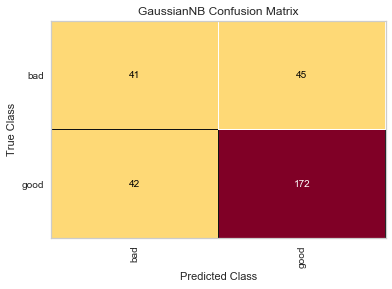

In [28]:
v=ConfusionMatrix(GaussianNB())
v.fit(x_treino, y_treino)
v.score(x_teste, y_teste)
v.poof()

In [29]:
novocredito = pd.read_csv('NovoCredit.csv')

novocredito = novocredito.iloc[:,0:20].values
novocredito[:,0] = labelencoder.fit_transform(novocredito[:,0])
novocredito[:,2] = labelencoder.fit_transform(novocredito[:,2])
novocredito[:,3] = labelencoder.fit_transform(novocredito[:,3])
novocredito[:,5] = labelencoder.fit_transform(novocredito[:,5])
novocredito[:,6] = labelencoder.fit_transform(novocredito[:,6])
novocredito[:,8] = labelencoder.fit_transform(novocredito[:,8])
novocredito[:,9] = labelencoder.fit_transform(novocredito[:,9])
novocredito[:,11] = labelencoder.fit_transform(novocredito[:,11])
novocredito[:,13] = labelencoder.fit_transform(novocredito[:,13])
novocredito[:,14] = labelencoder.fit_transform(novocredito[:,14])
novocredito[:,16] = labelencoder.fit_transform(novocredito[:,16])
novocredito[:,18] = labelencoder.fit_transform(novocredito[:,18])
novocredito[:,19] = labelencoder.fit_transform(novocredito[:,19])

In [31]:
novocredito.shape

(1, 20)

In [30]:
gnb.predict(novocredito)

array(['good'], dtype='<U4')

In [46]:
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.tree import export_graphviz

In [47]:
#Arvore Decisao
modelo= DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
export_graphviz(modelo, out_file='tree.dot')
#para visualizaro grafico da arvore de decisao deve abrir o arquivo copiar 
#os dados e utilizar um site de visualizacao de graphviz

In [49]:
previsao= modelo.predict(x_teste)
confusao= confusion_matrix(y_teste, previsao)

In [50]:
acerto= accuracy_score(y_teste, previsoes)
erro= 1- acerto

In [51]:
print(acerto)

0.71


In [52]:
print(erro)

0.29000000000000004


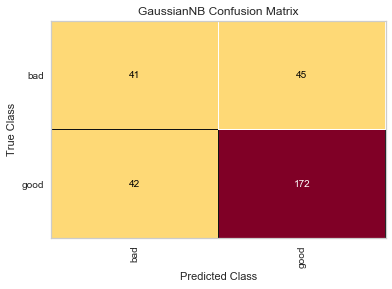

In [53]:
v = ConfusionMatrix(GaussianNB())
v.fit(x_treino, y_treino)
v.score(x_teste, y_teste)
v.poof()

In [8]:
#Selecao Atributos - SVC
from sklearn.svm import SVC
modelo = SVC()
modelo.fit(x_treino, y_treino)

previsao = modelo.predict(x_teste)

acerto= accuracy_score(y_teste, previsao)
erro= 1-acerto
print(acerto)
print(erro)

0.7133333333333334
0.2866666666666666


C:\Users\Pub\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [9]:
#Ensemble Methods?
#Classificando pelas caracteristicas mais importantes e depois aplicando o SVM
from sklearn.ensemble import ExtraTreesClassifier

forest= ExtraTreesClassifier()
forest.fit(x_treino, y_treino)
importancia= forest.feature_importances_



C:\Users\Pub\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
print(importancia)

[0.12570314 0.08073659 0.05730731 0.06576679 0.06943687 0.05197486
 0.05169625 0.05168385 0.04457666 0.02760446 0.05569474 0.04367083
 0.06377442 0.02906833 0.0347221  0.03742488 0.046501   0.02452026
 0.02806769 0.01006898]


In [12]:
x_treino2= x_treino[:,[0,1,2,3]]
x_teste2= x_teste[:,[0,1,2,3]]

svm2= SVC()
svm2.fit(x_treino2,y_treino)

previsao= svm2.predict(x_teste2)
acerto= accuracy_score(y_teste, previsao)
erro = 1 - acerto
print(acerto, erro)

0.7266666666666667 0.2733333333333333


C:\Users\Pub\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [2]:
#Aprendizado baseado em instancia
#KNN - K-nearest neighbors

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from scipy import stats

In [8]:
iris= datasets.load_iris()
stats.describe(iris.data)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [12]:
previsores= iris.data
classe= iris.target

x_treino, x_teste, y_treino, y_teste= train_test_split(previsores, 
                                                       classe, test_size=0.3, random_state=0)

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_treino, y_treino)

previsao= knn.predict(x_teste)
confusao= confusion_matrix(y_teste, previsao)
                           
acerto = accuracy_score(y_teste, previsao)   
erro = 1-acerto

print(acerto, erro)


0.9777777777777777 0.022222222222222254


In [20]:
#dataset - credito
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_treino, y_treino)

previsao= knn.predict(x_teste)
confusao= confusion_matrix(y_teste, previsao)
                           
acerto = accuracy_score(y_teste, previsao)   
erro = 1-acerto

print(acerto, erro)

0.6733333333333333 0.32666666666666666


In [13]:
print(confusao)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [11]:
#Ensamble learning- mais de um classificador
# random forest  - floresta aleatoria, gerar varias arvores de decisao e vai utilizar
# as respostas desta arvore para tomar uma resposta de decisao
from sklearn.ensemble import RandomForestClassifier


In [19]:
floresta= RandomForestClassifier(n_estimators=100)
floresta.fit(x_treino, y_treino)
previsao=floresta.predict(x_teste)
confusao= confusion_matrix(y_teste, previsao)

acerto= accuracy_score(y_teste, previsao)
erro= 1-acerto

print(confusao)
print(acerto, erro)

[[ 38  48]
 [ 15 199]]
0.79 0.20999999999999996


In [21]:
#exemplo usando knn
dados= pd.read_csv('iris.csv')

In [22]:
dados.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
colunas= dados.columns.drop('class')

In [26]:
x= dados[colunas].values

In [29]:
le= LabelEncoder()
y=le.fit_transform(dados['class'])

In [33]:
x_treino, x_teste, y_treino, y_teste= train_test_split(x, 
                                                       y, test_size=0.3)
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit (x_treino, y_treino)

previsao= knn.predict(x_teste)


In [34]:
confusao = confusion_matrix(y_teste, previsao)
acerto= accuracy_score(y_teste, previsao)
erro= 1-acerto

print(confusao)

print(acerto, erro)

[[19  0  0]
 [ 0 11  0]
 [ 0  0 15]]
1.0 0.0


In [49]:
#Regressao com knn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors


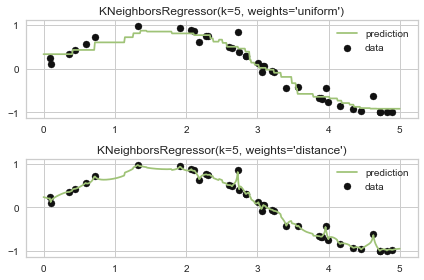

In [55]:
#gerando dados de amostra

np.random.seed(0)
x= np.sort(5 * np.random.rand(40,1), axis=0)
t= np.linspace(0,5,500)[:, np.newaxis]
y= np.sin(x).ravel()


#ruido
y[::5] += 1 * (0.5 - np.random.rand(8))

#treinado o modelo de regressao
n_neighbors=5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights= weights)
    y_= knn.fit(x, y).predict(t)
    
    plt.subplot(2, 1, i + 1)
    plt.scatter(x, y, c='k', label='data')
    plt.plot(t, y_, c='g', label= 'prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor(k=%i, weights='%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()
    
